In [30]:
#!pip install yfinance

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-15,84100.0
2021-04-16,83900.0
2021-04-19,83300.0


In [32]:
samsung_train_df = samsung_df[:317]
samsung_train_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-07,85600.0
2021-04-08,84700.0
2021-04-09,83600.0


In [33]:
samsung_test_df = samsung_df[317:]
samsung_test_df

,price
day,
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0
2021-04-19,83300.0
2021-04-20,83900.0
2021-04-21,82600.0


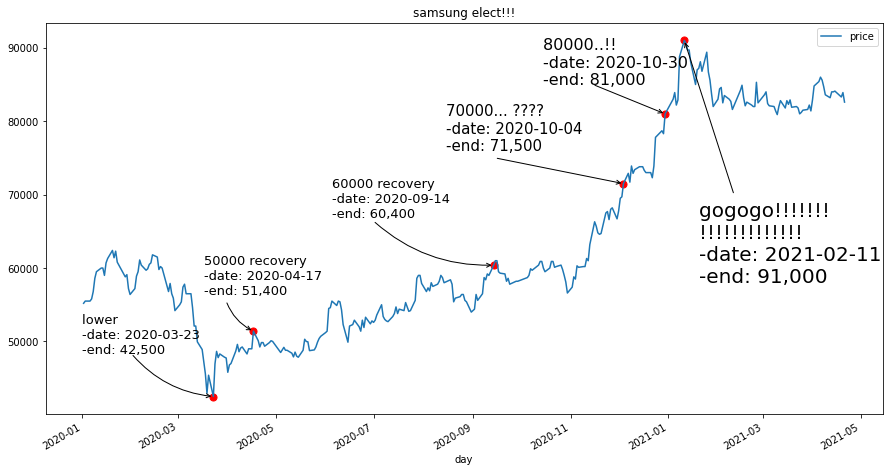

In [34]:
fig, ax = plt.subplots(figsize=(15, 8))
samsung_df.plot(ax=ax)

# 4만 최저점
ax.annotate('', xy=('2020-03-23' ,42500.0), xytext=('2020-02-01', 48300.0),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text('2020-01-01',48300, "lower \n-date: 2020-03-23 \n-end: 42,500",fontsize=13)

# 5만
ax.annotate('', xy=('2020-04-17' ,51400.0), xytext=('2020-03-31', 55500),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text('2020-03-17',56400, "50000 recovery \n-date: 2020-04-17\n-end: 51,400",fontsize=13)

# 6만
ax.annotate('', xy=('2020-09-14' ,60400.0), xytext=('2020-07-01', 66400),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text('2020-06-05',66900, "60000 recovery \n-date: 2020-09-14\n-end: 60,400",fontsize=13)

# 7만
ax.annotate('', xy=('2020-12-04' ,71500.0), xytext=('2020-09-15', 75000),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0"),
           )

plt.text('2020-08-15',76000, "70000... ???? \n-date: 2020-10-04\n-end: 71,500",fontsize=15)

# 8만
ax.annotate('', xy=('2020-12-30' ,81000.0), xytext=('2020-11-15', 85000),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0"),
           )

plt.text('2020-10-15',85000, "80000..!! \n-date: 2020-10-30\n-end: 81,000",fontsize=16)

# 9만
ax.annotate('', xy=('2021-01-11' ,91000.0), xytext=('2021-02-11', 70000),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0"),
           )

plt.text('2021-01-20',58000, "gogogo!!!!!!! \n!!!!!!!!!!!!! \n-date: 2021-02-11\n-end: 91,000",fontsize=20)



# Scatter plot 추가
y1 = ['2020-03-23','2020-04-17' ,'2020-09-14','2020-12-04','2020-12-30','2021-01-11'] 
y2 = [42500,51400,60400,71500,81000,91000]


plt.scatter(y1,y2,s=50,color='r')

plt.title("samsung elect!!!")
plt.show()


In [35]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(samsung_train_df.price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  316
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2694.895
Method:                       css-mle   S.D. of innovations           1217.716
Date:                Thu, 09 Dec 2021   AIC                           5401.790
Time:                        12:39:43   BIC                           5424.325
Sample:                             1   HQIC                          5410.792
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.0412     69.663      1.307      0.192     -45.496     227.579
ar.L1.D.y      1.2546      0.012    103.401      0.000       1.231       1.278
ar.L2.D.y     -0.9947      0.007   -150.500      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning:

invalid value encountered in sqrt



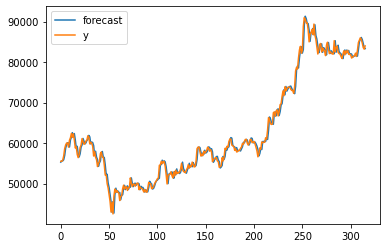

In [36]:
# 핛습 데이터에 대한 예측 결과

fig = model_fit.plot_predict()

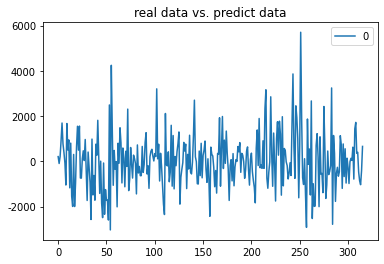

In [37]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "real data vs. predict data")

In [38]:
forecast_data = model_fit.forecast(steps=5) 

In [39]:
# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_arima_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = samsung_test_df.price.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

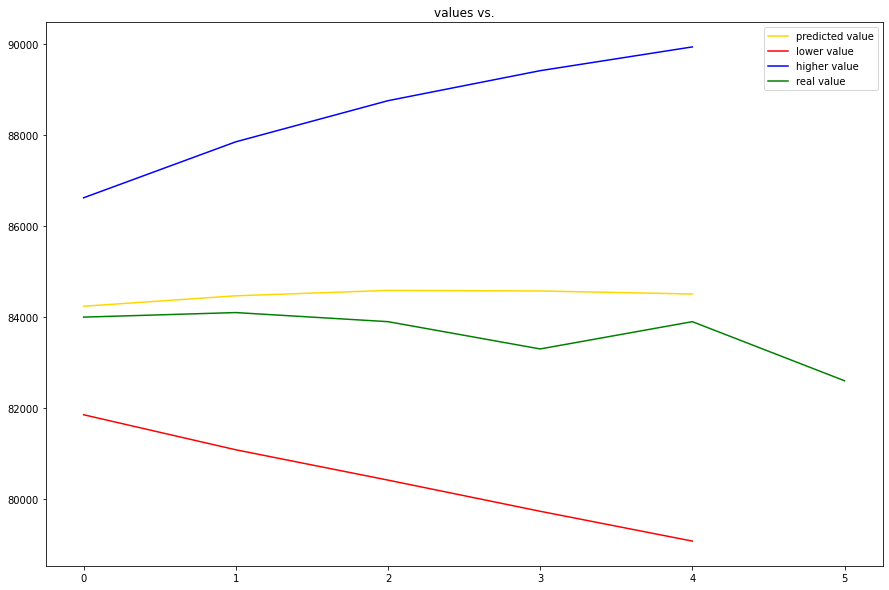

In [40]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['predicted value', 'lower value','higher value','real value'])
plt.title("values vs.")
plt.show()

In [41]:
from fbprophet import Prophet


samsung_df = samsung_df.reset_index()

samsung_df.columns = ['ds', 'y']

samsung_train_df = samsung_df[:317]
samsung_test_df = samsung_df[317:]

In [42]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(samsung_train_df)

In [43]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
317,2021-04-14,84697.939052,83093.070465,86297.372532
318,2021-04-15,84406.375516,82616.215279,86041.136857
319,2021-04-16,84057.882277,82433.126503,85593.825980
320,2021-04-17,75340.001930,73715.868214,76990.144666
321,2021-04-18,74964.027647,73256.797135,76497.307857


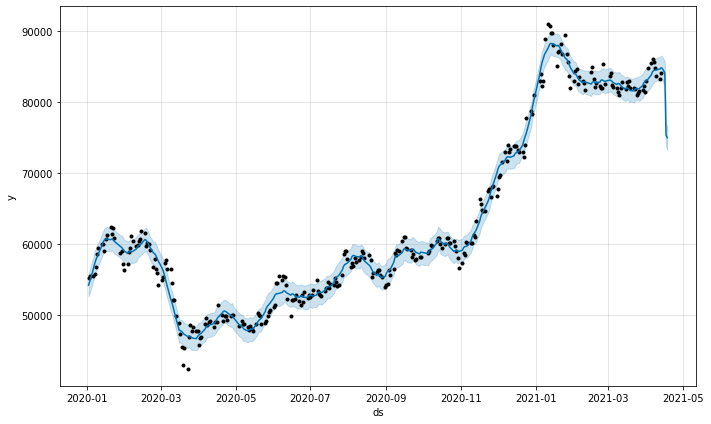

In [44]:
fig1 = prophet.plot(forecast_data)

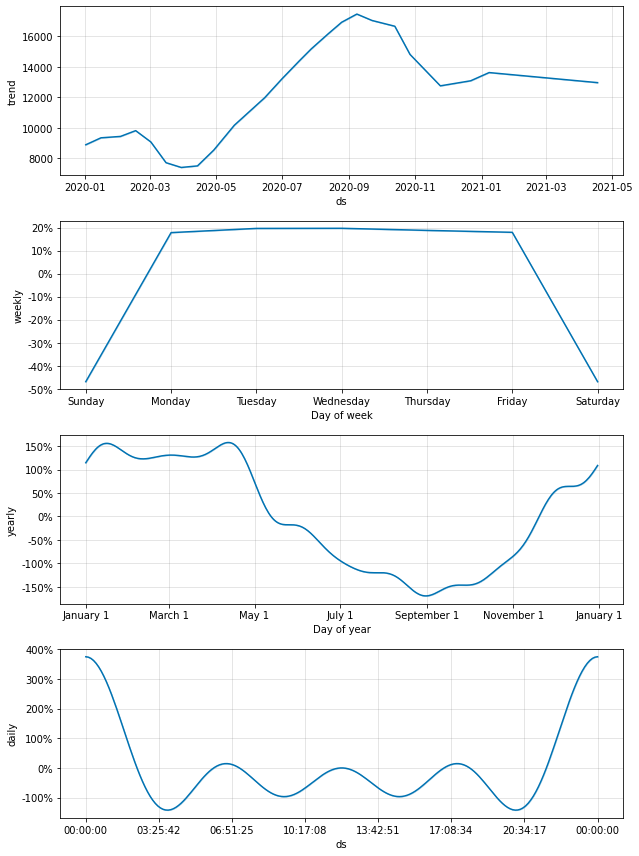

In [45]:
fig2 = prophet.plot_components(forecast_data)

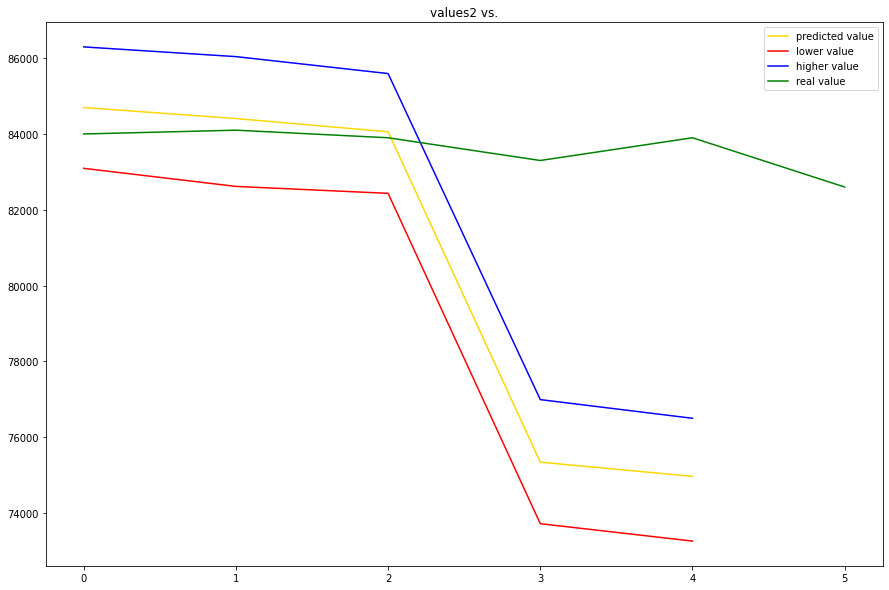

In [46]:
plt.figure(figsize=(15, 10))

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_fbprophet_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = samsung_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['predicted value', 'lower value','higher value','real value'])
plt.title("values2 vs.")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



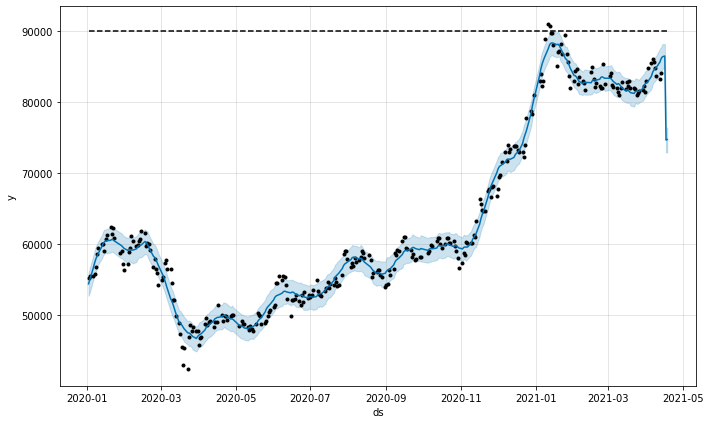

In [47]:
# 상한가 설정
samsung_train_df['cap'] = 90000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode = 'multiplicative',
                 growth = 'logistic',
                 yearly_seasonality = True,
                 weekly_seasonality = True, 
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(samsung_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

# 상한가 설정
future_data['cap'] = 90000
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



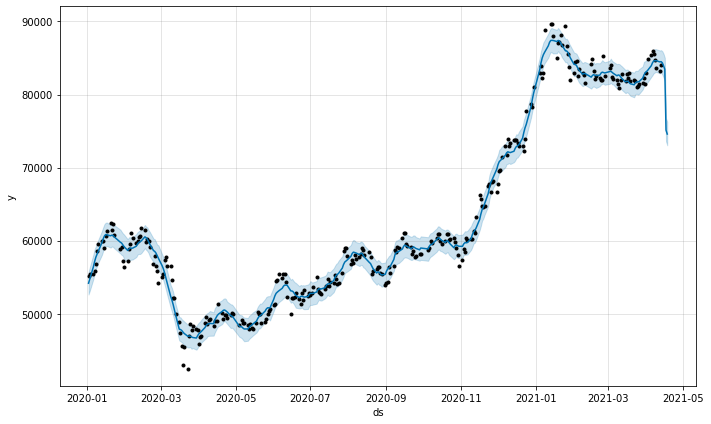

In [48]:
samsung_train_df.loc[samsung_train_df['y'] > 90000, 'y'] = None

# prophet 모델 학습
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(samsung_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

In [49]:
pred_fbprophet_y_1 = forecast_data.yhat.values[-5:]

In [57]:
test_y = test_y[:5]
test_y

array([84000., 84100., 83900., 83300., 83900.])

In [55]:
len(pred_arima_y)

5

In [58]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   'FBprophet 이상치 제거 후(90000) 예측값':pred_fbprophet_y_1,
                   '실제값' : test_y
                   })

df

,ARIMA 예측값,FBprophet 예측값,FBprophet 이상치 제거 후(90000) 예측값,실제값
0,84238.737314,84697.939052,84337.001557,84000.0
1,84469.023280,84406.375516,83926.677078,84100.0
2,84587.850705,84057.882277,83457.567176,83900.0
3,84575.246652,75340.001930,75118.134155,83300.0
4,84508.613677,74964.027647,74591.859907,83900.0


Text(0.5, 1.0, 'value vs.')

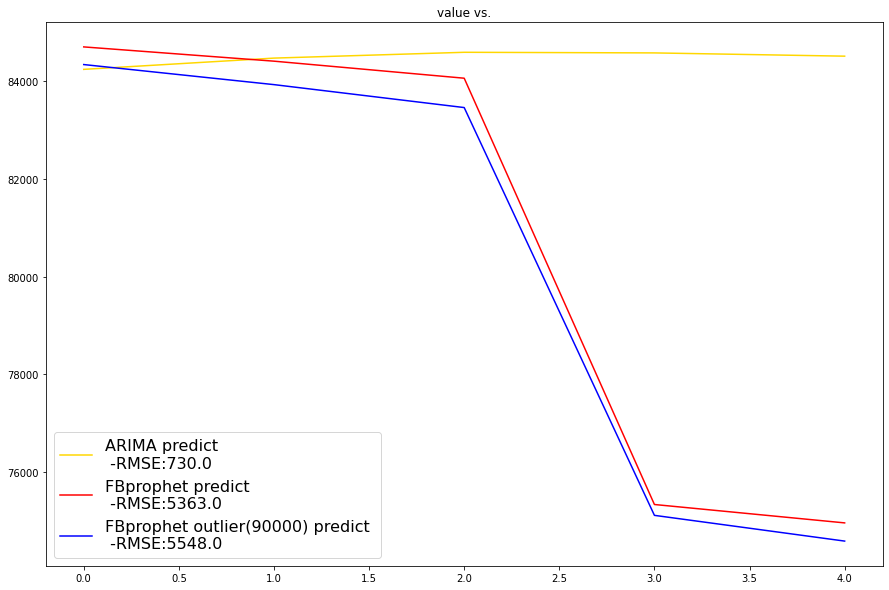

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 전처리 진행한 fbprophet 모델의  rmse
rmse_fbprophet_1 = sqrt(mean_squared_error(pred_fbprophet_y_1, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(df[['FBprophet 이상치 제거 후(90000) 예측값']], color = 'blue')

# 실제 가격 그래프
# plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA predict \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet predict  \n -RMSE:' + str(round(rmse_fbprophet,0)),
            'FBprophet outlier(90000) predict \n -RMSE:' + str(round(rmse_fbprophet_1,0))])
plt.title("value vs.")